# Interpolation Exercise 2

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('white')

In [2]:
from scipy.interpolate import griddata
from scipy.interpolate import interp1d
from scipy.interpolate import interp2d

## Sparse 2d interpolation

In this example the values of a scalar field $f(x,y)$ are known at a very limited set of points in a square domain:

* The square domain covers the region $x\in[-5,5]$ and $y\in[-5,5]$.
* The values of $f(x,y)$ are zero on the boundary of the square at integer spaced points.
* The value of $f$ is known at a single interior point: $f(0,0)=1.0$.
* The function $f$ is not known at any other points.

Create arrays `x`, `y`, `f`:

* `x` should be a 1d array of the x coordinates on the boundary and the 1 interior point.
* `y` should be a 1d array of the y coordinates on the boundary and the 1 interior point.
* `f` should be a 1d array of the values of f at the corresponding x and y coordinates.

You might find that `np.hstack` is helpful.

In [94]:
xb=np.array([-5,-4,-3,-2,-1,0,1,2,3,4,5])
yb=np.array([-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5])
yt=np.array([5]*11)
yc=np.array(0)
x=np.hstack((xb,xb,yb[1:10],yt[1:10],yc))
y=np.hstack((yb,yt,xb[1:10],xb[1:10],yc))
f1=np.array([0]*40)
f2=[1]
f=np.hstack((f1,f2))


The following plot should show the points on the boundary and the single point in the interior:

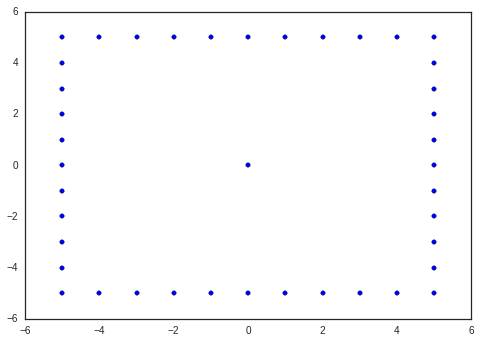

In [5]:
plt.scatter(x,y);

In [6]:
assert x.shape==(41,)
assert y.shape==(41,)
assert f.shape==(41,)
assert np.count_nonzero(f)==1

Use `meshgrid` and `griddata` to interpolate the function $f(x,y)$ on the entire square domain:

* `xnew` and `ynew` should be 1d arrays with 100 points between $[-5,5]$.
* `Xnew` and `Ynew` should be 2d versions of `xnew` and `ynew` created by `meshgrid`.
* `Fnew` should be a 2d array with the interpolated values of $f(x,y)$ at the points (`Xnew`,`Ynew`).
* Use cubic spline interpolation.

In [113]:
# F=np.meshgrid(f,y)
xnew=np.linspace(-5,5,100)
ynew=xnew
Xnew,Ynew=np.meshgrid(xnew,ynew)
Fnew=griddata((x,y),f,(Xnew,Ynew),method='cubic') # worked with Jessi Pilgram


In [114]:
assert xnew.shape==(100,)
assert ynew.shape==(100,)
assert Xnew.shape==(100,100)
assert Ynew.shape==(100,100)
assert Fnew.shape==(100,100)

Plot the values of the interpolated scalar field using a contour plot. Customize your plot to make it effective and beautiful.

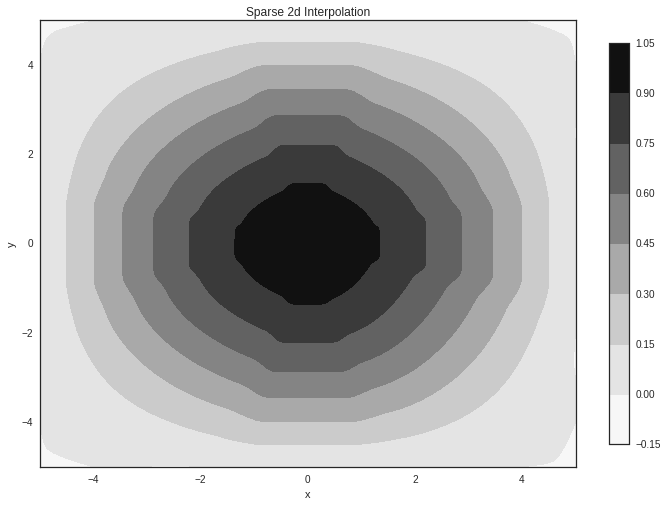

In [133]:
plt.figure(figsize=(12,8))
plt.contourf(Xnew,Ynew,Fnew)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sparse 2d Interpolation')
plt.colorbar(shrink=.9)


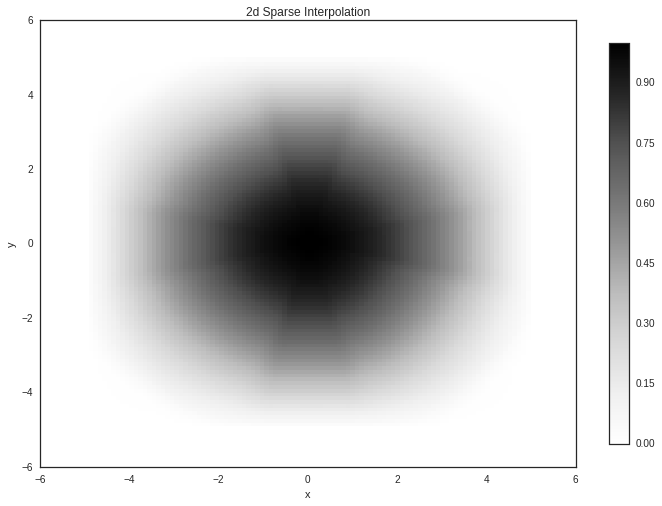

In [134]:
plt.figure(figsize=(12,8))
plt.pcolor(Xnew,Ynew,Fnew)
plt.xlabel('x')
plt.ylabel('y')
plt.title('2d Sparse Interpolation')
plt.colorbar(shrink=.9)

In [116]:
assert True # leave this to grade the plot